In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from Advertising.learners.Greedy_algorithm import *
from experiment_utilities import *

seed = 6789 

arms = arms_creation(seed = 30291, number_of_arms= 20)

random.seed(seed)

exploration=4.2

deltas=[0.5,0.42,0.38,0.30,0.2,0.05]

social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')


with open('Config/clairvoyants_sw.json', 'r') as file:
    clairvoyants = json.load(file)

with open('Config/bids.json', 'r') as file:
    data = json.load(file)
    bids = data.get('bids')


n_rounds = 5000
interval = 5000
window_size = 5000


In [2]:
from Advertising.learners.UCB_sw import *

vcg = VCG()
learner = UCB_sw(arms = arms, hyperpar= exploration, window_size= window_size)

step = 0
for t in trange(n_rounds):
    if t % interval == 0:
        all_bids = bids[step]
        step +=1 

    arm_idx = learner.pull_arm()

    print(arm_idx)
    arm = arms[arm_idx]
    all_bids.insert(0, arm)

    ad_allocation_list = setup(bids=all_bids, n_bids=5)
    best_allocation = vcg.all_best_allocations(ad_allocation_list, social_network)

    for j in range(0, len(best_allocation)):
        temp_allocation = []
        temp_allocation = best_allocation[j]
        for k in range(0, len(best_allocation[j])):
            if temp_allocation[k].ad_id == 1 and k != 0:
                temp_allocation[k].ad_id = None
                best_allocation[j] = temp_allocation
    
    
    payments = vcg.payments(ad_allocation_list, best_allocation, social_network)

    active_nodes, total_reward = activate_cascade(social_network=social_network, ad_allocation_list=best_allocation, slot_prominence=deltas)
    payments_tot = calculate_total_payment(payments, social_network.categories, active_nodes)
        
    reward = total_reward - payments_tot
    

    learner.update(pulled_arm_idx= arm_idx, reward = reward)
    reset_nodes(social_network=social_network)
    all_bids.pop(0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5
11
7
7
15
3
3
3
7
10
10
3
3
8
5
0
11
11
11
1
5
5
5
5
19
19
1
4
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14


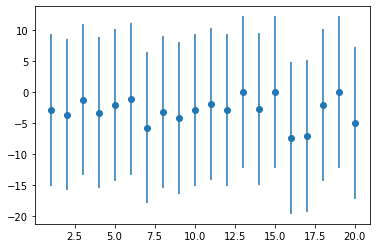

In [3]:
array = [i+1 for i in range(0, 20)]


plt.figure(1)
plt.errorbar(array, learner.exp_values, yerr=learner.bounds, fmt='o')
plt.show()

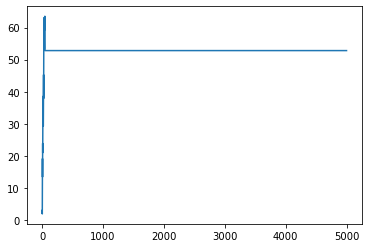

In [4]:
plt.figure()
plt.plot(np.cumsum(learner.collected_rewards))

